In [1]:
#import library

#for data processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

#for modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#removing warning when plotting seaborn
import warnings
warnings.filterwarnings('ignore')

#for uploud file
import os

In [26]:
#data preparation

#saving each dataset into variable
rate = pd.read_csv('tourism_rating(1).csv')
place = pd.read_csv('tourism_with_id(1).csv', encoding="ISO-8859-1", error_bad_lines=False)
user = pd.read_csv('user.csv')


In [ ]:
# DATA PLACE

In [27]:
#showing data place
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Pantai Nampu,Pantai Nampu adalah objek wisata pantai yang b...,Wisata Bahari,Wonogiri,5000,4.5,129,"{'lat': -8.19960, 'lng': 110.90042}","-8,199,060","110,900,042",NaN,1
1,2,Pantai Pulau Panjang,Pulau Panjang menjadi salah satu tempat wisata...,Wisata Bahari,Jepara,5000,4.5,15,"{'lat': -5.51725, 'lng': 106.52147}","-5,517,025","106,521,047",NaN,2
2,3,Pantai Bandengan,Pantai Tirto Samudro atau Pantai Klein Scheven...,Wisata Bahari,Jepara,10000,4.4,20,"{'lat': -6.55406, 'lng': 110.64872}","-6,554,006","110,648,072",NaN,3
3,4,Pantai Karang Bolong,"Karangbolong Pada awalnya, pantai yang berada ...",Wisata Bahari,Kebumen,15000,4.3,30,"{'lat': -7.758035, 'lng': 109.467794}","-7,758,035","109,467,794",NaN,4
4,5,Pantai Bopong,Pantai Bopong menjadi tempat piknik di Kebumen...,Wisata Bahari,Kebumen,5000,4.1,45,"{'lat': -7.76296, 'lng': 109.51781}","-7,762,096","109,517,081",NaN,5


In [28]:
#remove unused column

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Pantai Nampu,Pantai Nampu adalah objek wisata pantai yang b...,Wisata Bahari,Wonogiri,5000,4.5,129,"{'lat': -8.19960, 'lng': 110.90042}","-8,199,060","110,900,042"
1,2,Pantai Pulau Panjang,Pulau Panjang menjadi salah satu tempat wisata...,Wisata Bahari,Jepara,5000,4.5,15,"{'lat': -5.51725, 'lng': 106.52147}","-5,517,025","106,521,047"
2,3,Pantai Bandengan,Pantai Tirto Samudro atau Pantai Klein Scheven...,Wisata Bahari,Jepara,10000,4.4,20,"{'lat': -6.55406, 'lng': 110.64872}","-6,554,006","110,648,072"
3,4,Pantai Karang Bolong,"Karangbolong Pada awalnya, pantai yang berada ...",Wisata Bahari,Kebumen,15000,4.3,30,"{'lat': -7.758035, 'lng': 109.467794}","-7,758,035","109,467,794"
4,5,Pantai Bopong,Pantai Bopong menjadi tempat piknik di Kebumen...,Wisata Bahari,Kebumen,5000,4.1,45,"{'lat': -7.76296, 'lng': 109.51781}","-7,762,096","109,517,081"


In [29]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      59 non-null     int64  
 1   Place_Name    59 non-null     object 
 2   Description   59 non-null     object 
 3   Category      59 non-null     object 
 4   City          59 non-null     object 
 5   Price         59 non-null     int64  
 6   Rating        59 non-null     float64
 7   Time_Minutes  59 non-null     int64  
 8   Coordinate    59 non-null     object 
 9   Lat           59 non-null     object 
 10  Long          59 non-null     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 5.2+ KB


In [30]:
# remove unused column

place = place.drop('Time_Minutes', axis=1)
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Pantai Nampu,Pantai Nampu adalah objek wisata pantai yang b...,Wisata Bahari,Wonogiri,5000,4.5,"{'lat': -8.19960, 'lng': 110.90042}","-8,199,060","110,900,042"
1,2,Pantai Pulau Panjang,Pulau Panjang menjadi salah satu tempat wisata...,Wisata Bahari,Jepara,5000,4.5,"{'lat': -5.51725, 'lng': 106.52147}","-5,517,025","106,521,047"
2,3,Pantai Bandengan,Pantai Tirto Samudro atau Pantai Klein Scheven...,Wisata Bahari,Jepara,10000,4.4,"{'lat': -6.55406, 'lng': 110.64872}","-6,554,006","110,648,072"
3,4,Pantai Karang Bolong,"Karangbolong Pada awalnya, pantai yang berada ...",Wisata Bahari,Kebumen,15000,4.3,"{'lat': -7.758035, 'lng': 109.467794}","-7,758,035","109,467,794"
4,5,Pantai Bopong,Pantai Bopong menjadi tempat piknik di Kebumen...,Wisata Bahari,Kebumen,5000,4.1,"{'lat': -7.76296, 'lng': 109.51781}","-7,762,096","109,517,081"


In [ ]:
# DATA RATING

In [31]:
# showing data rating
rate.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,9,3
1,1,34,2
2,1,5,5
3,1,33,3
4,1,10,4


In [32]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        3284 non-null   int64
 1   Place_Id       3284 non-null   int64
 2   Place_Ratings  3284 non-null   int64
dtypes: int64(3)
memory usage: 77.1 KB


In [33]:
# Showing rating dataset large 

rate.shape

(3284, 3)

In [ ]:
#DATA USER

In [34]:
# showing data user
user.head(5)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [35]:
# Showing user dataset large

user.shape

(300, 3)

In [ ]:
#DATA EXPLORATION

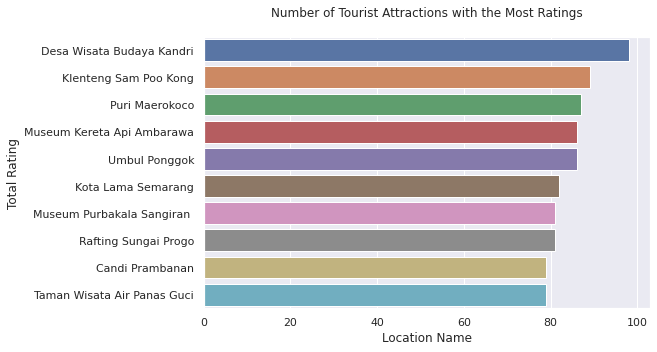

In [36]:
# Create a dataframe containing the location with the highest number of ratings
top_10 = rate['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Create a tourist visualization with the highest number of ratings
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Number of Tourist Attractions with the Most Ratings', pad=20)
plt.ylabel('Total Rating')
plt.xlabel('Location Name')
plt.show()

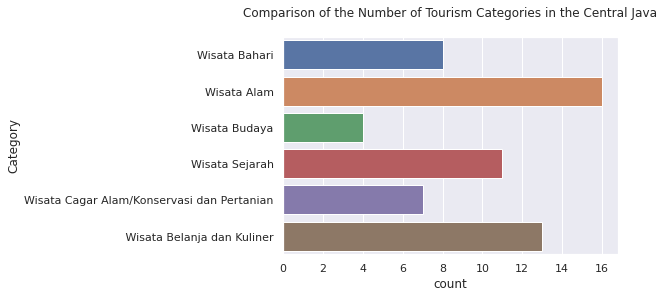

In [38]:
# Make a visualization of the number of tourism categories 

sns.countplot(y='Category', data=place)
plt.title('Comparison of the Number of Tourism Categories in the Central Java', pad=20)
plt.show()

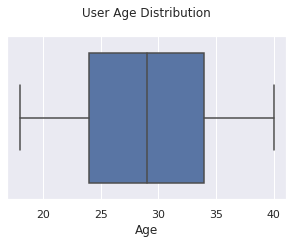

In [39]:
# Create user age distribution visualization

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('User Age Distribution', pad=20)
plt.show()

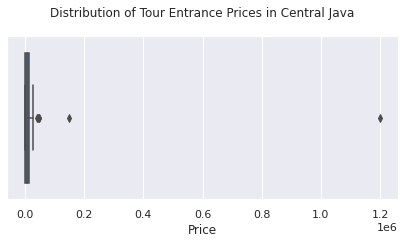

In [40]:
# Make a visualization of the distribution of tourist attractions entrance prices

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribution of Tour Entrance Prices in Central Java', pad=20)
plt.show()

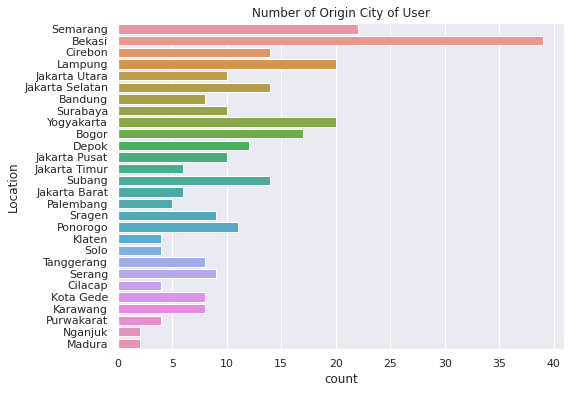

In [41]:
# Filtering origin city from user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the origin of the city from the user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of Origin City of User')
plt.show()

In [ ]:
# DATA MODELLING PREPARATION

In [42]:
# create copy of data rating

# Read the dataset for encoding
df = rate.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,1,9,3
1,1,34,2
2,1,5,5
3,1,33,3
4,1,10,4


In [43]:
# do encoding

# Creating Functions for Encoding
def dict_encoder(col, data=df):

  # Converting a column of a dataframe into a list without the same value
  unique_val = data[col].unique().tolist()

  # Encoding the column values of a dataframe to numbers
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Perform the process of encoding numbers to values from columns of a dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [44]:
# Encoding and Mapping User column

# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id to dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [45]:
# Encoding and Mapping Place column

# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id to dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [46]:
# Viewing Data Overview for Modeling

# Get total user and place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Convert rating to float value
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Get the minimum and maximum rating
min_rate, max_rate = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rate}, Max Rating: {max_rate}')

Number of User: 100, Number of Place: 64, Min Rating: 1.0, Max Rating: 5.0


In [47]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42)
df.head(5)

,User_Id,Place_Id,Place_Ratings,user,place
2208,68,27,3.0,67,42
1084,34,32,4.0,33,26
1655,52,20,1.0,51,7
1651,51,35,4.0,50,48
1450,45,7,2.0,44,15


In [ ]:
# ML Modelling Using RecommenderNet

In [48]:
# Split train and test data

# Create a variable x to match user and place data into one value
x = df[['user', 'place']].values
 
# Create a variable y to make a rating of the results 
y = df['Place_Ratings'].apply(lambda x: (x - min_rate) / (max_rate - min_rate)).values
 
# Splits into 80% train data and 20% validation data
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
# Preparing Modell

In [49]:
class RecommenderNet(tf.keras.Model):
 
  # Function initialization
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # calling layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # calling layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # calling layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # calling layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [50]:
# Modell initialization
model = RecommenderNet(num_users, num_place, 50) 
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [51]:
# Callbacks initialization
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Validation metric is as expected!')
      self.model.stop_training = True

In [ ]:
# Training Process

In [52]:
# Start training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
83/83 [==============================] - 2s 6ms/step - loss: 0.7972 - root_mean_squared_error: 0.3881 - val_loss: 0.7504 - val_root_mean_squared_error: 0.3663
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7951 - root_mean_squared_error: 0.3855 - val_loss: 0.7478 - val_root_mean_squared_error: 0.3647
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7877 - root_mean_squared_error: 0.3826 - val_loss: 0.7475 - val_root_mean_squared_error: 0.3643
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7974 - root_mean_squared_error: 0.3878 - val_loss: 0.7458 - val_root_mean_squared_error: 0.3634
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7737 - root_mean_squared_error: 0.3748 - val_loss: 0.7471 - val_root_mean_squared_error: 0.3643
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7946 - root_mean_squared_error: 0.3848 - val_loss: 0.7465 - val_root_m

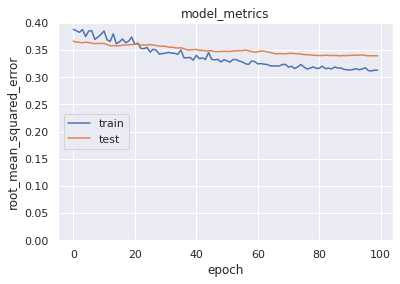

In [53]:
# Display loss plots and validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
# Predict top 5 Recommendation

In [54]:
# Setting Up a DataFrame to Display Recommended Results

# Preapring dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rate.copy()

In [ ]:
# Setting up User samples to Show Recommendations

In [55]:
# Looking for user
# Take sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
# Searching for Locations that the User hasn't Visited

In [56]:
# Create location data that has not been visited by the user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
# Displaying Recommendation Results for Users

In [57]:
# Take top 5 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('List of Recommendation for: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('The place with the highest travel rating from users')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 5 Recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Price of admission : ', row.price, ',', 'Travel Rating : ', row.rating,'\n')

print('==='*15)

List of Recommendation for: User 29

------------------------------------------------------------
The place with the highest travel rating from users
------------------------------------------------------------
Pantai Karang Jahe : Wisata Bahari
Lawang Sewu : Wisata Sejarah
Candi Prambanan : Wisata Sejarah
Taman Nasional Karimunjawa : Wisata Cagar Alam/Konservasi dan Pertanian
Cagar Alam Telogo Ranjeng : Wisata Cagar Alam/Konservasi dan Pertanian

------------------------------------------------------------
Top 5 Recommendation
------------------------------------------------------------
1 . Pantai Menganti 
     Wisata Bahari , Price of admission :  10000 , Travel Rating :  4.6 

2 . Taman Wisata Air Panas Guci 
     Wisata Alam , Price of admission :  20000 , Travel Rating :  4.5 

3 . Masjid Agung Jawa Tengah 
     Wisata Sejarah , Price of admission :  0 , Travel Rating :  4.7 

4 . Pasar Semawis  
      Wisata Belanja dan Kuliner , Price of admission :  0 , Travel Rating :  4.5 



In [ ]:
#generate a saved model

In [58]:
import pathlib
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [59]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [60]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [61]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

38888

In [62]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [68]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>